In [1]:
import warnings
import os
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
    print(df.columns)
    print(df.shape)
except Exception:
    print("Seems we have a problem")

Index(['_id', 'sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'street', 'street_number',
       'neighborhood', 'address_area', 'address_neighborhood', 'sale_day_year',
       'sale_day_month', 'final_price'],
      dtype='object')
(304431, 17)


In [3]:
used_features = [
    'street', 
    'neighborhood',
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city',
    'sale_day_year'
]

In [4]:
X = df[used_features]
y = df['final_price']


In [5]:
cities = [
    "תל אביב יפו",
    "חיפה",
    "באר שבע",
    "ירושלים",
    "פתח תקווה",
    "אשדוד",
    "אשקלון",
    "נתניה",
    "ראשון לציון",
    "חולון",
    "רמת גן",
    "בת ים",
    "רחובות",
    "חדרה",
    "נהריה",
    "אילת",
    "קרית אתא",
    "עפולה",
    "בני ברק",
    "לוד"
]

test_size = 0.3

cities = {city: {"processor": None, "algo": None} for city in cities}


תל אביב יפו
(23201, 17)
(23201, 1045)


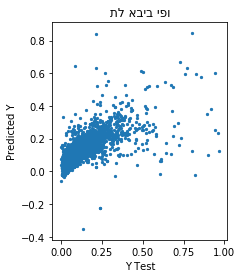

Mean squared error: 0.00
Mean squared error sqrt: 0.056754189818229994
Variance score: 0.54
חיפה
(21320, 17)
(21320, 764)


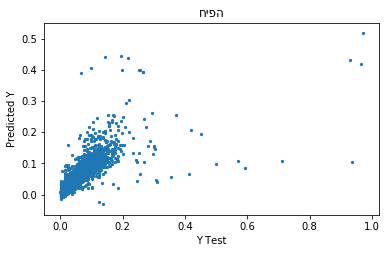

Mean squared error: 0.00
Mean squared error sqrt: 0.02867589331237382
Variance score: 0.59
באר שבע
(18557, 17)
(18557, 667)


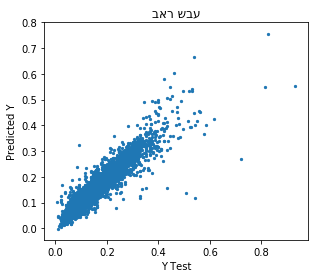

Mean squared error: 0.00
Mean squared error sqrt: 0.030614222855801874
Variance score: 0.87
ירושלים
(21330, 17)
(21330, 918)


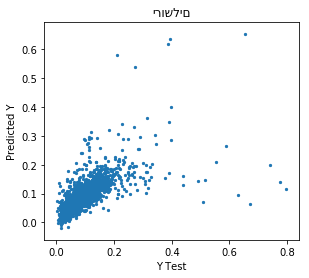

Mean squared error: 0.00
Mean squared error sqrt: 0.030725584311105596
Variance score: 0.55
פתח תקווה
(14260, 17)
(14260, 636)


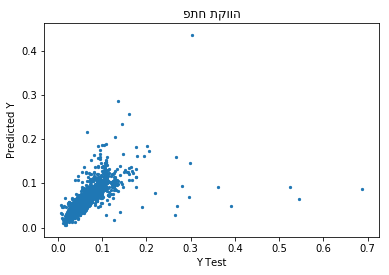

Mean squared error: 0.00
Mean squared error sqrt: 0.021016101547720028
Variance score: 0.49
אשדוד
(13580, 17)
(13580, 555)


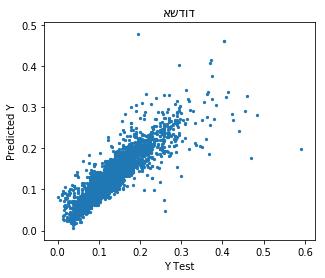

Mean squared error: 0.00
Mean squared error sqrt: 0.025875605448119232
Variance score: 0.80
אשקלון
(12646, 17)
(12646, 541)


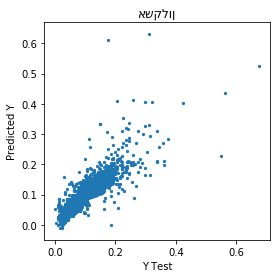

Mean squared error: 0.00
Mean squared error sqrt: 0.024134392870472587
Variance score: 0.77
נתניה
(12932, 17)
(12932, 587)


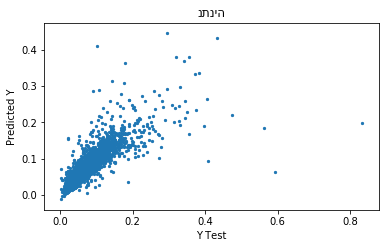

Mean squared error: 0.00
Mean squared error sqrt: 0.027734180649896897
Variance score: 0.67
ראשון לציון
(11998, 17)
(11998, 680)


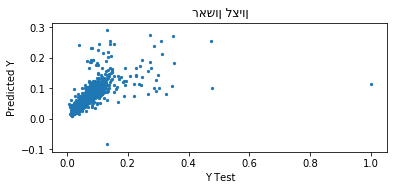

Mean squared error: 0.00
Mean squared error sqrt: 0.024843498678368
Variance score: 0.52
חולון
(9876, 17)
(9876, 516)


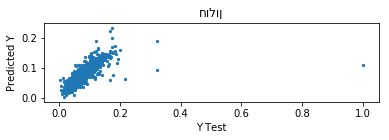

Mean squared error: 0.00
Mean squared error sqrt: 0.020754500169682173
Variance score: 0.61
רמת גן
(9055, 17)
(9055, 538)


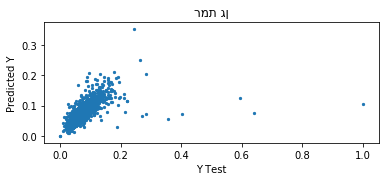

Mean squared error: 0.00
Mean squared error sqrt: 0.02951836498185891
Variance score: 0.40
בת ים
(8441, 17)
(8441, 417)


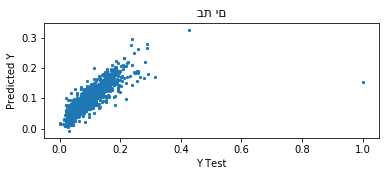

Mean squared error: 0.00
Mean squared error sqrt: 0.024529136539434896
Variance score: 0.71
רחובות
(7511, 17)
(7511, 506)


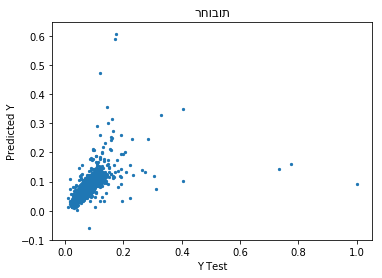

Mean squared error: 0.00
Mean squared error sqrt: 0.037609080021442406
Variance score: 0.19
חדרה
(6446, 17)
(6446, 479)


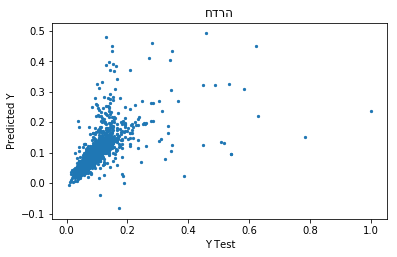

Mean squared error: 0.00
Mean squared error sqrt: 0.051199967845136064
Variance score: 0.30
נהריה
(5346, 17)
(5346, 373)


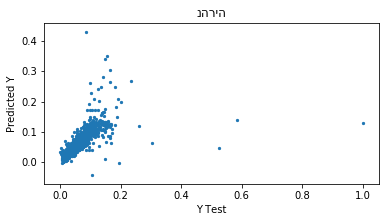

Mean squared error: 0.00
Mean squared error sqrt: 0.035667859960061686
Variance score: 0.35
אילת
(5185, 17)
(5185, 416)


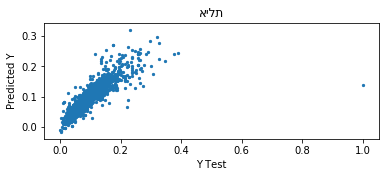

Mean squared error: 0.00
Mean squared error sqrt: 0.03277764583307408
Variance score: 0.70
קרית אתא
(4528, 17)
(4528, 419)


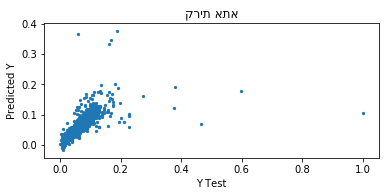

Mean squared error: 0.00
Mean squared error sqrt: 0.037127501487816086
Variance score: 0.44
עפולה
(4208, 17)
(4208, 406)


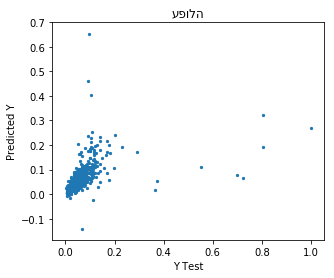

Mean squared error: 0.00
Mean squared error sqrt: 0.05325220578169291
Variance score: 0.18
בני ברק
(3405, 17)
(3405, 338)


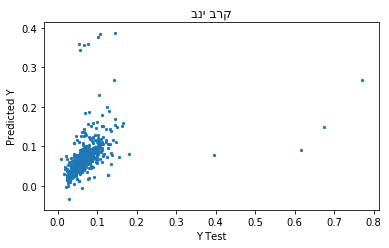

Mean squared error: 0.00
Mean squared error sqrt: 0.04251119244256457
Variance score: 0.01
לוד
(3223, 17)
(3223, 337)


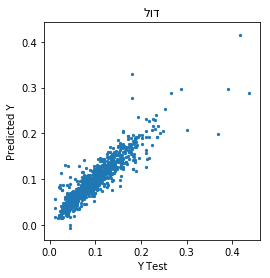

Mean squared error: 0.00
Mean squared error sqrt: 0.02095905566570875
Variance score: 0.83


In [6]:

for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    
    min_max_scalar = preprocessing.MinMaxScaler()
    y = min_max_scalar.fit_transform(np.array(y).reshape(-1, 1))
    y = pd.DataFrame(y)

    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)
    print(X.shape)
    
    # TODO: don't use, it takes too much time to estimate
    # poly = preprocessing.PolynomialFeatures(2, interaction_only=True, include_bias=False)
    # X = poly.fit_transform(X)
    # print(datetime.now())
    # print(X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    predictions = lm.predict(X_test)
    plt.scatter(y_test, predictions, s=5)
    plt.title(city)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
    print("Mean squared error sqrt:", sqrt(mean_squared_error(y_test, predictions)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, predictions))

תל אביב יפו
(23201, 9)
(23201, 1045)
0.5594514594961688


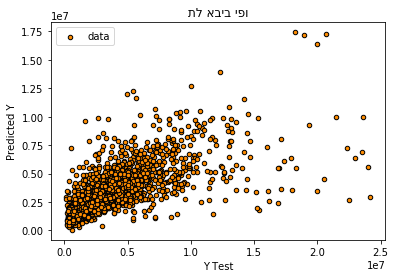

חיפה
(21320, 9)
(21320, 764)
0.685108785893537


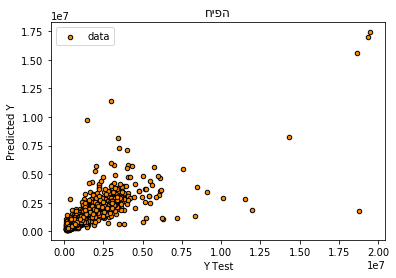

באר שבע
(18557, 9)
(18557, 667)
0.8599108966321534


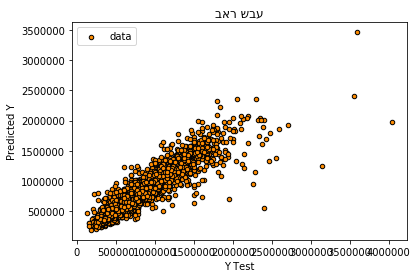

ירושלים
(21330, 9)
(21330, 918)
0.5067251254535232


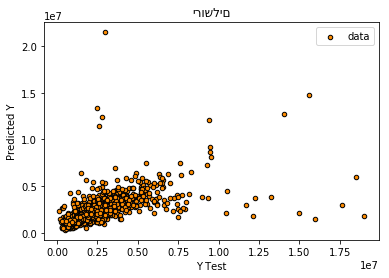

פתח תקווה
(14260, 9)
(14260, 636)
0.5500817473286661


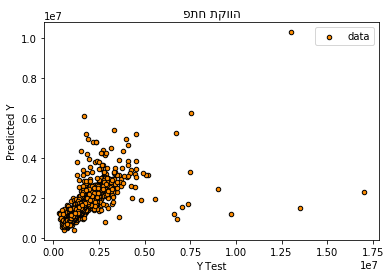

אשדוד
(13580, 9)
(13580, 555)
0.8136451230373798


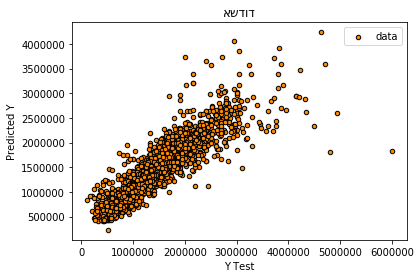

אשקלון
(12646, 9)
(12646, 541)
0.8227455806316133


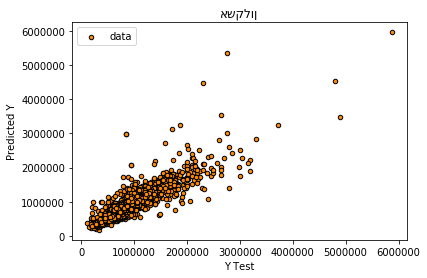

נתניה
(12932, 9)
(12932, 587)
0.7256764875942594


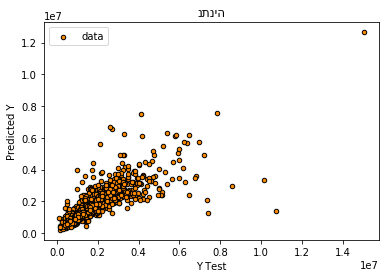

ראשון לציון
(11998, 9)
(11998, 680)
0.5339833017616851


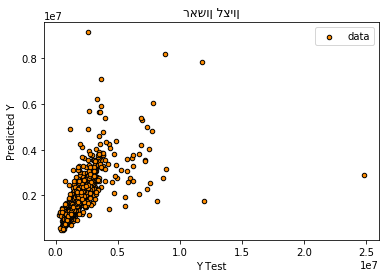

חולון
(9876, 9)
(9876, 516)
0.6132740475226566


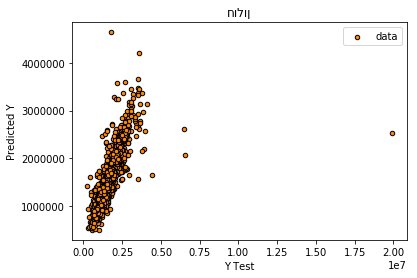

רמת גן
(9055, 9)
(9055, 538)
0.3307161442387363


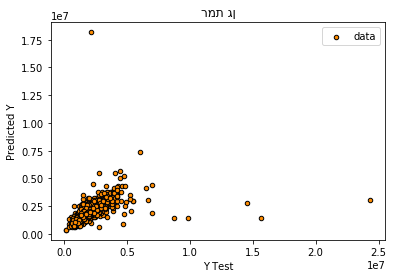

בת ים
(8441, 9)
(8441, 417)
0.7452529922031822


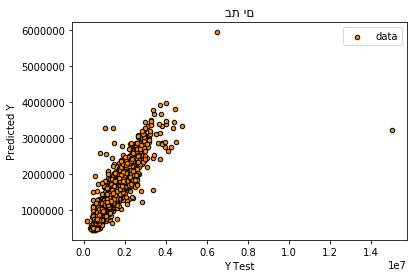

רחובות
(7511, 9)
(7511, 506)
0.36007044648163045


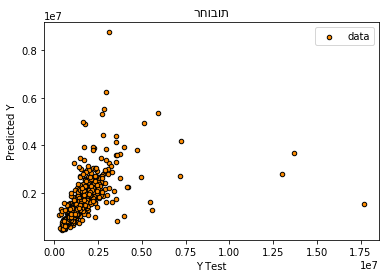

חדרה
(6446, 9)
(6446, 479)
0.4454864972836935


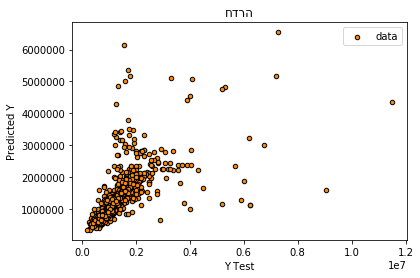

נהריה
(5346, 9)
(5346, 373)
0.4010473946793839


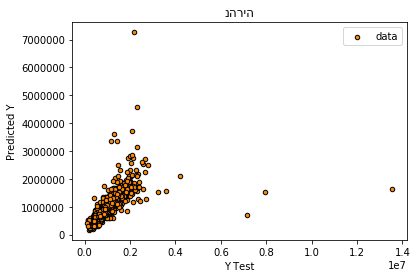

אילת
(5185, 9)
(5185, 416)
0.7499601391890031


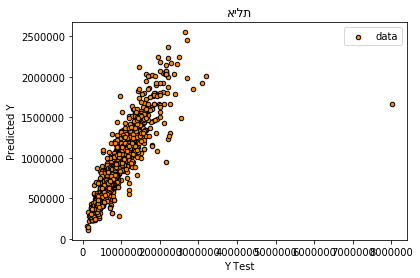

קרית אתא
(4528, 9)
(4528, 419)
0.477803485157261


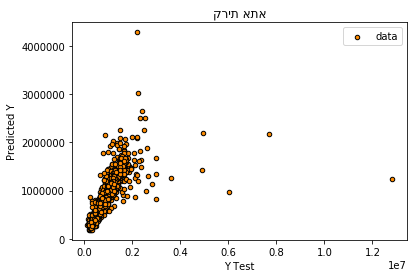

עפולה
(4208, 9)
(4208, 406)
0.40566252274611814


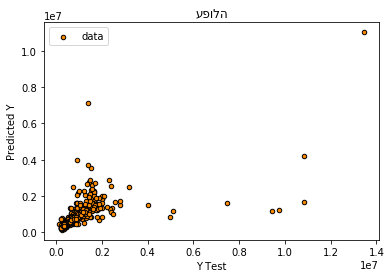

בני ברק
(3405, 9)
(3405, 338)
0.34607692493917774


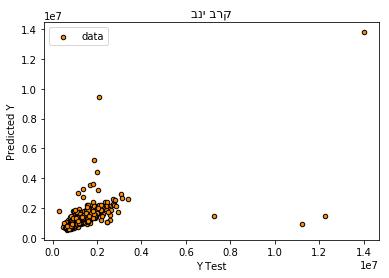

לוד
(3223, 9)
(3223, 337)
0.7334793940413158


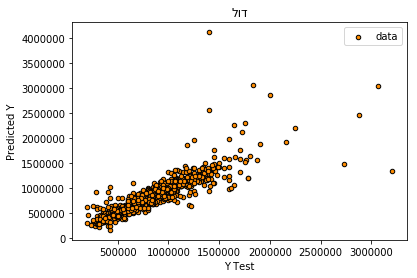

In [7]:
# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    X = _df[used_features]
    y = _df['final_price']
    print(X.shape)

    ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')
    X = ohe.fit_transform(X)
    cities[city]["processor"] = ohe
    print(X.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
#     # for tuning parameters
#     from sklearn.model_selection import GridSearchCV
#     param_grip = {
#         'learning_rate': [0.1, 0.05, 0.02],
#         'max_depth': [4, 6, 8],
#         'min_samples_leaf': [1, 3],
#         'max_features': [1.0, 0.3]
#     }
#     clf = GradientBoostingRegressor(n_estimators=1000)
#     gs_cv = GridSearchCV(clf, param_grip).fit(X_train, y_train)
#     print(gs_cv.best_params_)
#     continue
    clf = GradientBoostingRegressor(n_estimators=450,
                                    max_depth=8,
                                    learning_rate=0.05,
                                    max_features=0.3,
                                    random_state=1)
    clf.fit(X_train, y_train)
    cities[city]["algo"] = clf
    y_pred = clf.predict(X_test)
    print(clf.score(X_test, y_test))
    
    # Plot the results
    plt.figure()
    plt.scatter(y_test, y_pred, s=20, edgecolor="black", c="darkorange", label="data")
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(city)
    plt.legend()
    plt.show()


In [8]:
# באר שבע
d = {
    'street': ["דוד הראובני", "יצחק רגר", "משה פריבס", "מאיר גרוסמן", "התקווה"], 
    'neighborhood': ["נוה מנחם", "שכונה ב'", "רמות הרכס", "נאות אילן", "מרכז אזרחי"],
    'property_type': ["דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות"], 
    'rooms_number': [4, 4, 4, 4, 4], 
    'floor': [2, 10, 2, 2, 2],
    'build_year': ["2015-01-01", "2019-01-01", "2010-01-01", "2016-01-01", "2019-01-01"],
    'building_mr': [115, 116, 120, 120, 113],
    'city': ["באר שבע", "באר שבע", "באר שבע", "באר שבע", "באר שבע"],
    'sale_day_year': ["2019", "2019", "2019", "2019", "2019"]
}
_X = pd.DataFrame(data=d)
print(_X.head())
_X = cities['באר שבע']["processor"].transform(_X)
y_pred = cities['באר שבע']["algo"].predict(_X)
print(y_pred.tolist())


        street neighborhood    property_type  rooms_number  floor  build_year  \
0  דוד הראובני     נוה מנחם  דירת בבית קומות             4      2  2015-01-01   
1     יצחק רגר     שכונה ב'  דירת בבית קומות             4     10  2019-01-01   
2    משה פריבס    רמות הרכס  דירת בבית קומות             4      2  2010-01-01   
3  מאיר גרוסמן    נאות אילן  דירת בבית קומות             4      2  2016-01-01   
4       התקווה   מרכז אזרחי  דירת בבית קומות             4      2  2019-01-01   

   building_mr     city sale_day_year  
0          115  באר שבע          2019  
1          116  באר שבע          2019  
2          120  באר שבע          2019  
3          120  באר שבע          2019  
4          113  באר שבע          2019  
[1018101.3363702267, 921399.1853155718, 940744.6618726096, 1012414.0211237661, 1233261.292652875]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    y, info = pd.qcut(np.array(y), 10, retbins=True)
    print(info)
    y = pd.DataFrame(y.codes)
    
    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)

    rfc = RandomForestClassifier(n_estimators=150)
    rfc.fit(X_train,y_train)

    predictions = rfc.predict(X_test)
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))


תל אביב יפו
(23201, 17)
[  100800.  1036000.  1350000.  1650000.  1925000.  2235000.  2550000.
  2900000.  3450000.  4430000. 24999999.]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       695
           1       0.50      0.48      0.49       693
           2       0.38      0.40      0.39       659
           3       0.40      0.40      0.40       666
           4       0.38      0.35      0.36       708
           5       0.38      0.37      0.38       691
           6       0.37      0.37      0.37       718
           7       0.40      0.39      0.39       724
           8       0.43      0.43      0.43       698
           9       0.63      0.68      0.65       709

   micro avg       0.45      0.45      0.45      6961
   macro avg       0.45      0.45      0.45      6961
weighted avg       0.45      0.45      0.45      6961

[[442 116  62  15  22   7   7   6  10   8]
 [147 335 123  34  16  15   5   7   7   4]
 [ 54 134 265 103 

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       367
           1       0.51      0.45      0.48       395
           2       0.41      0.47      0.44       397
           3       0.38      0.37      0.38       393
           4       0.41      0.43      0.42       406
           5       0.36      0.34      0.35       402
           6       0.46      0.39      0.42       383
           7       0.52      0.46      0.49       383
           8       0.54      0.56      0.55       368
           9       0.72      0.76      0.74       386

   micro avg       0.49      0.49      0.49      3880
   macro avg       0.49      0.50      0.49      3880
weighted avg       0.49      0.49      0.49      3880

[[268  63  23   5   4   1   0   2   1   0]
 [ 91 177  98  15   8   4   1   0   1   0]
 [ 26  68 188  74  27  12   0   1   0   1]
 [  8  23  89 147  80  26   9   7   1   3]
 [  9   4  35  83 176  68  18   5   3   5]
 [  7   7  15  37  84 137 

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       173
           1       0.50      0.50      0.50       155
           2       0.40      0.49      0.44       154
           3       0.31      0.29      0.30       168
           4       0.36      0.33      0.34       156
           5       0.40      0.31      0.35       175
           6       0.38      0.43      0.41       160
           7       0.45      0.40      0.42       144
           8       0.56      0.57      0.56       168
           9       0.69      0.74      0.71       151

   micro avg       0.49      0.49      0.49      1604
   macro avg       0.48      0.48      0.48      1604
weighted avg       0.48      0.49      0.48      1604

[[138  26   5   0   1   0   1   0   1   1]
 [ 33  78  35   2   6   1   0   0   0   0]
 [  6  31  76  30   6   2   1   2   0   0]
 [  5   9  49  48  28  14  10   4   1   0]
 [  1   3  12  39  51  27  17   4   2   0]
 [  2   4   8  15  30  55 

In [10]:
# saving objects
for city, values in cities.items():
    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    joblib.dump(values["processor"], os.path.join(folder, "processor.joblib"))
    joblib.dump(values["algo"], os.path.join(folder, "algo.joblib"))

In [11]:
# to load:
cities = {city: {
    "processor": joblib.load(os.path.join("pickles", city, "processor.joblib")), 
    "algo": joblib.load(os.path.join("pickles", city, "algo.joblib"))
} for city in cities}